<a href="https://colab.research.google.com/github/paulsoumyadip/airline_referral/blob/main/Airline_Passenger_referral_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PROJECT NAME : *AIRLINE PASSENGER REFERRAL PREDICTION***
*** ***
*  ##### **Project Type**    - Classification
*  ##### **Contribution**    - Team
*  ##### **Team Member 1 -** Soumyadip Paul 
*  ##### **Team Member 2 -** Aishwarya K P
*  ##### **Team Member 3 -** Akshat Raj Kumawat

# **PROJECT OBJECTIVE : *TO PREDICT WILL PAASENGERS WILL REFER THE AIRLINE TO THEIR FRIENDS***

*****










* # **Github LINK-**

* Enter
* Link
* Here

# **PROJECT SUMMARY :**


CONTRIBUTION OF EACH MEMBER FILL HERE.

* # **PROBLEM DESCRIPTION :-**
*****
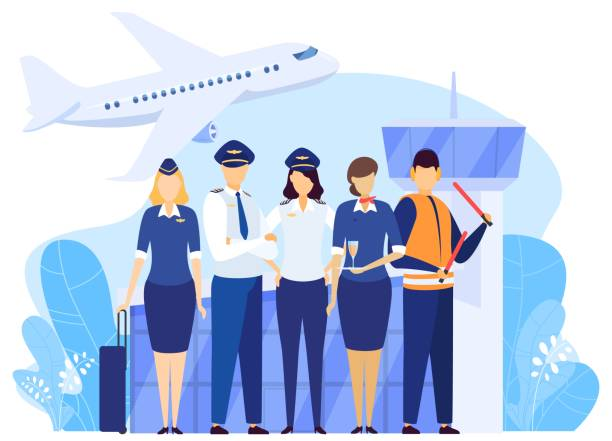


*The Airline passenger Referral system has become the most important criteria globally for the airline industry in order to address the surge which has been created after global pandemic so as to remain in the global market competition. Airline referral system generally works on customer reviews which is basically sentiment given by the customer depending upon various factor like seat comfort, their trip distance, route they have travelled, timing, the airline frequency, ground service etc. we will be using classification algorithm to predict whether the passenger will refer the airlines to their friends or not*

* # **BUSINESS CONTEXT:**

*In the airline industry, customer satisfaction and word-of-mouth referrals are crucial for the growth and success of a company. Referrals from satisfied customers can drive new business and enhance the reputation of the airline. However, it can be challenging for airlines to predict which customers are likely to refer them to their friends and family.*

*This is where machine learning can play a vital role. By using historical customer data, a machine learning model can identify patterns and correlations that indicate a high likelihood of referral. This information can then be used by airlines to target specific customers with personalized marketing campaigns or incentives, increasing the chances of referral and promoting growth.*

*The model can take into account various factors such as customer demographics, flight history, and in-flight experience to make its predictions. Additionally, the model can be regularly updated with new data to maintain its accuracy and relevance.*

*In conclusion, a machine learning model that predicts the likelihood of referral can provide valuable insights for airlines looking to enhance their customer satisfaction and drive growth through word-of-mouth referrals.*

## ***Project Work flow :***

* #### *Importing Libraries*
* #### *Loading the Dataset*
* #### *EDA on features*
* #### *Feature Engineering*
* #### *Data Cleaning*
* #### *Feature selection*
* #### *Fitting the classification models and HyperParameter Tuning*
* #### *Comparison of Models*
* #### *Final selection of the model*


******

# **DATA PREPARATION:**

In [1]:
#Mount the drive to load the dataset 
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm

# importing required classes for model selection.
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# importing model evaluation metrics.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# importing warnings library to avoid unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mount the drive to load the dataset 
file_path ='/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Classification Capstone/Data Set/data_airline_reviews.xlsx' 
airline_df=pd.read_excel(file_path)

In [4]:
# List of Ten sample Data :
airline_df.sample(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
81708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10373,Lufthansa,1.0,Calin Lungu,9th March 2017,âœ… Verified Review | Berlin to Munich. What a...,A320,Business,Business Class,Berlin to Munich,March 2017,3.0,1.0,1.0,NaN,3.0,1.0,no
110375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97259,Air India,NaN,T Loucaides,22nd May 2015,I was returning from a business trip in India ...,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,no
19569,American Airlines,1.0,Jill Dunne,8th May 2015,This was the worst travelling experience! The ...,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,no
121373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46843,British Airways,6.0,Edward Smyth,28th June 2016,Club Europe flights from London Gatwick to Sev...,A320,Couple Leisure,Business Class,LGW to SVQ,June 2016,3.0,5.0,4.0,NaN,3.0,3.0,yes
82209,Singapore Airlines,8.0,P Tan,21st December 2017,âœ… Trip Verified | Singapore to Bangkok retur...,NaN,Solo Leisure,Economy Class,Singapore to Bangkok,October 2017,5.0,4.0,4.0,4.0,5.0,4.0,yes
72558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# List of Columns of dataset :
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

*The recommended column is the dependent variable rest of them are feature column*

*Let's see if we can understand what do these columns mean:*

#### ***The Dataset contains features lke:***



*   airline: Name of the airline.
*   overall: Overall point is given to the trip between 1 to 10.

*   author: Author of the trip

*   reviewdate: Date of the Review

*   customer review: Review of the customers in free text format

*   aircraft: Type of the aircraft
*   travellertype: Type of traveler (e.g. business, leisure)


*   cabin: Cabin at the flight


*   date flown: Flight date


*   seatcomfort: Rated between 1-5

*   cabin service: Rated between 1-5

*   foodbev: Rated between 1-5

*   entertainment: Rated between 1-5
*   groundservice: Rated between 1-5


*   valueformoney: Rated between 1-5

*   recommended: Binary, target variable





In [6]:
# shape of the Dataset :
airline_df.shape

(131895, 17)

### Null values and duplicates


We can conclude from the last 10 rows that the dataset contains null values. Let's figure out how many of null values in each column of this massive dataset.

In [7]:
# checking the Null values
airline_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

As we can see, approximately 60% of the data in the dataset is null values. Let's look into it further.

In [8]:
# Checking the duplicate values
len(airline_df.duplicated())

131895

There are 1,31,895 duplicate values in the airline dataset. Before we reduce the number of null and duplicate values, let us first determine the actual percentage of missing values.

In [9]:
# function for finding Missing values :
def missing_values_check(df):
    percent_missing = airline_df.isnull().sum() * 100 / len(airline_df)
    missing_values_df = pd.DataFrame({'column_name': airline_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [10]:
# Percentage of missing values :
missing_values_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,85.050229
ground_service,ground_service,70.159597
date_flown,date_flown,69.951097
route,route,69.880587
traveller_type,traveller_type,69.858600
entertainment,entertainment,66.493802
food_bev,food_bev,60.113727
seat_comfort,seat_comfort,53.992949
cabin_service,cabin_service,53.967171
cabin,cabin,52.005004


Based on the results of the above analysis, it is clear that our dataset contains a large number of null values. Because 'recommended' is the target variable here, Let's concentrate the null value count in respect of 'recommended' first.

In [11]:
#Creating a copy before the data preparation and analysis
airline_df_copy =airline_df.copy()


In [12]:
# Let's create a dataset where columns contain null values in respect to 'recommended' column
recommended_nulvalues = airline_df[airline_df['recommended'].isnull()]

In [13]:
# count of null values in the new dataset
recommended_nulvalues.isnull().sum()

airline            65948
overall            65968
author             65948
review_date        65948
customer_review    65948
aircraft           67454
traveller_type     67454
cabin              67454
route              67454
date_flown         67455
seat_comfort       67455
cabin_service      67455
food_bev           67455
entertainment      67455
ground_service     67455
value_for_money    67455
recommended        67455
dtype: int64

In [14]:
# using function to check the null values percentage
missing_values_check(recommended_nulvalues)

,column_name,percent_missing
aircraft,aircraft,85.050229
ground_service,ground_service,70.159597
date_flown,date_flown,69.951097
route,route,69.880587
traveller_type,traveller_type,69.858600
entertainment,entertainment,66.493802
food_bev,food_bev,60.113727
seat_comfort,seat_comfort,53.992949
cabin_service,cabin_service,53.967171
cabin,cabin,52.005004


It is clear that the null values in the columns are higher in relation to the 'recommended' column. Because it contains so many null values, this subset of the dataset can affect analysis and prediction. As a result, it is preferable to remove these columns from the original dataset.

In [15]:
# Let's drop the Null values of all columns with respect to 'recommended' column
airline_df.drop(airline_df[airline_df['recommended'].isnull()].index , inplace = True)

In [16]:
# Function to check the null value percentage
missing_values_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,69.402545
ground_service,ground_service,38.923029
date_flown,date_flown,38.496276
route,route,38.353507
traveller_type,traveller_type,38.308504
entertainment,entertainment,31.419926
food_bev,food_bev,18.361266
seat_comfort,seat_comfort,5.833333
cabin_service,cabin_service,5.780571
overall,overall,2.963998


In [17]:
# checking the unique values in the each columns of the dataset
airline_df.nunique()

airline               81
overall               10
author             43289
review_date         3010
customer_review    59750
aircraft            2088
traveller_type         4
cabin                  4
route              24548
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

* There are a large number of aircraft. The percentage of null values in them is also high.
As a result, 'aircraft' column can be removed.
* The percentage of null values in date flown is also high. We can remove this column to reduce the number of null values because we will be focusing more on the reviews and their subset scores.
* The column 'author' has no relevance to the prediction. As a result, this column can also be removed.

In [18]:
# dropping the columns
airline_df.drop(['author','aircraft','date_flown'] , axis = 1 , inplace = True)

In [19]:
# Again let's check the null value count in each columns
missing_values_check(airline_df)

,column_name,percent_missing
ground_service,ground_service,38.923029
route,route,38.353507
traveller_type,traveller_type,38.308504
entertainment,entertainment,31.419926
food_bev,food_bev,18.361266
seat_comfort,seat_comfort,5.833333
cabin_service,cabin_service,5.780571
overall,overall,2.963998
cabin,cabin,1.765984
value_for_money,value_for_money,0.721601


There are still a lot of null values. Let's remove the rows that still have null values in them.

In [20]:
# Dropping the null value rows
airline_df.dropna(axis=0,how='any',inplace = True)

In [21]:
# First 5 rows of dataset
airline_df.head()

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no


Now, Let's check the duplicate values in the remaining dataset

In [22]:
#Checking the number of duplicates in the dataset
len(airline_df[airline_df.duplicated( keep='first')])

1744

There are 1744 duplicate values present in our dataset . Let's remove them.

In [23]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)

In [24]:
#confirming that the duplicate rows are deleted
len(airline_df[airline_df.duplicated( keep='first')])

0

In [25]:
# Function to check the null values 
missing_values_check(airline_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
review_date,review_date,0.0
customer_review,customer_review,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
route,route,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0


Now, its look clean. Let's check the shape of airline dataset.

In [26]:
airline_df.shape

(22826, 14)

In [27]:
# Comparing the size of changed dataset with original dataset and calculating its percentage
perc =(len(airline_df)/len(airline_df_copy))  * 100
perc

17.306190530346107

*Approximately 82% of the original data was removed because it contained Null values.*

# **EXPLORATORY DATA ANALYSIS AND VISUALIZATION:**

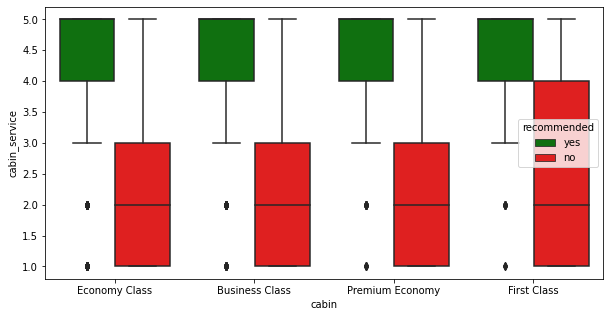

In [28]:
#Cabin type and cabin service ratings
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.cabin, airline_df.cabin_service, hue = airline_df['recommended'], palette= ['Green','red'])

* When compared to other classes, people recommend first class the least. 
* Only those who rated 4.0 to 5.0 will make a recommendation.

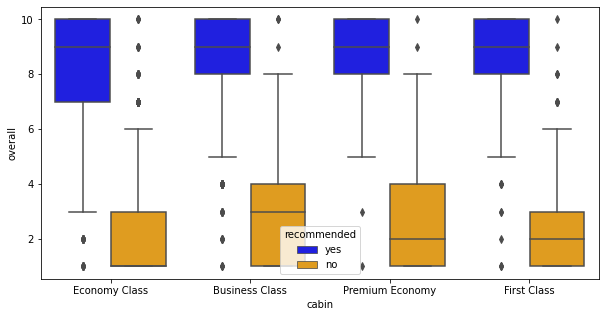

In [29]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.cabin, airline_df.overall, hue = airline_df['recommended'], palette= ['blue','orange'])

* The overall rating for the 'Economy class' cabin type is favourable. As a result, it is recommended.
* From above its clear that, Both Business and Premium Economy Class are not recommended.

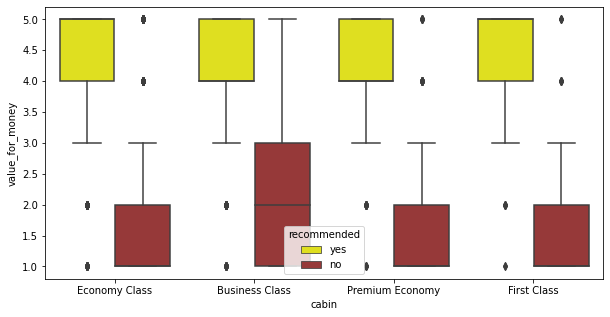

In [30]:
#Cabin type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.cabin, airline_df.value_for_money, hue = airline_df['recommended'], palette= ['yellow','brown'])

* Only those people who have given the 'value for money' rating of 4 or higher have been recommended to others.
* It is clear from the above that business class travel is not recommended because it is not worth of money.

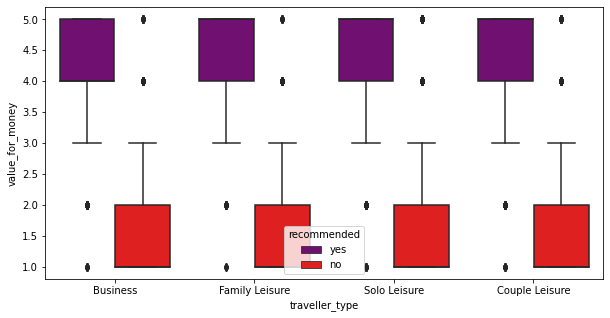

In [31]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.traveller_type, airline_df.value_for_money, hue = airline_df['recommended'], palette= ['purple' , 'red'])

* As we can see from the graph above, all type of traveller type is highly advised if the value for money rating is greater than 4.
* If the rating of value of money is below 2, all the traveller type is not recommended.

In [32]:
#Check the unique overall ratings
airline_df.overall.unique()

array([ 7.,  2.,  3., 10.,  1.,  6.,  8.,  5.,  4.,  9.])

Since the "overall" ratings are out of 10, and the other ratings are scaled from 0 to 5, let's divide the "overall" ratings by 2 to make comparisons and visualisations easier.

In [33]:
# divide the 'overall' rating by 2
airline_df["overall"] = airline_df["overall"]/2

In [34]:
# Grouping the various ratings columns to one list
review_columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

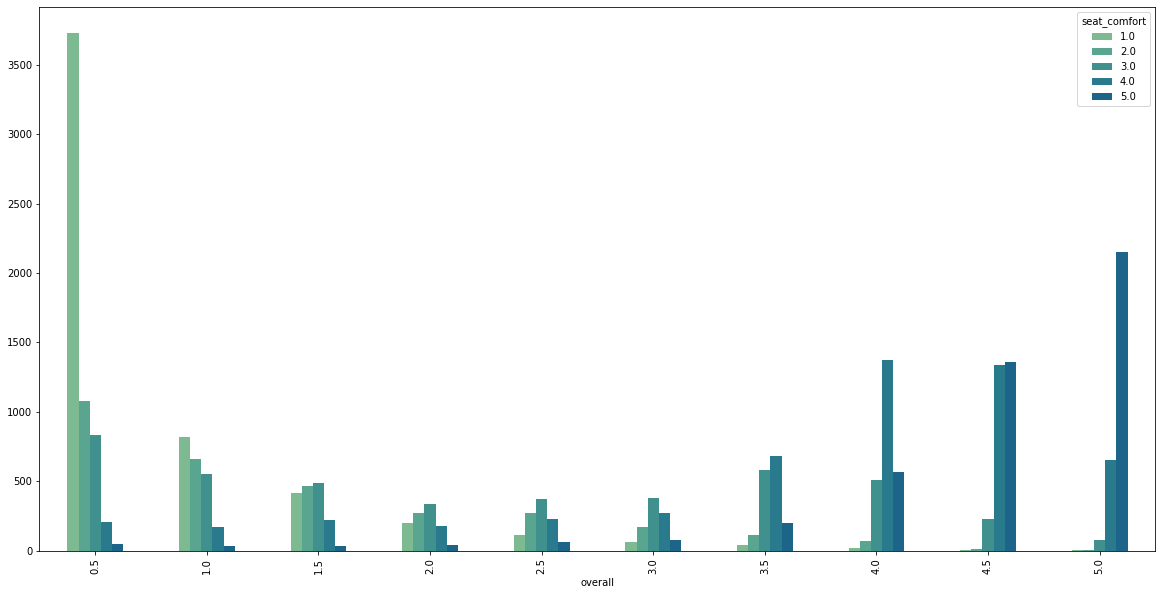

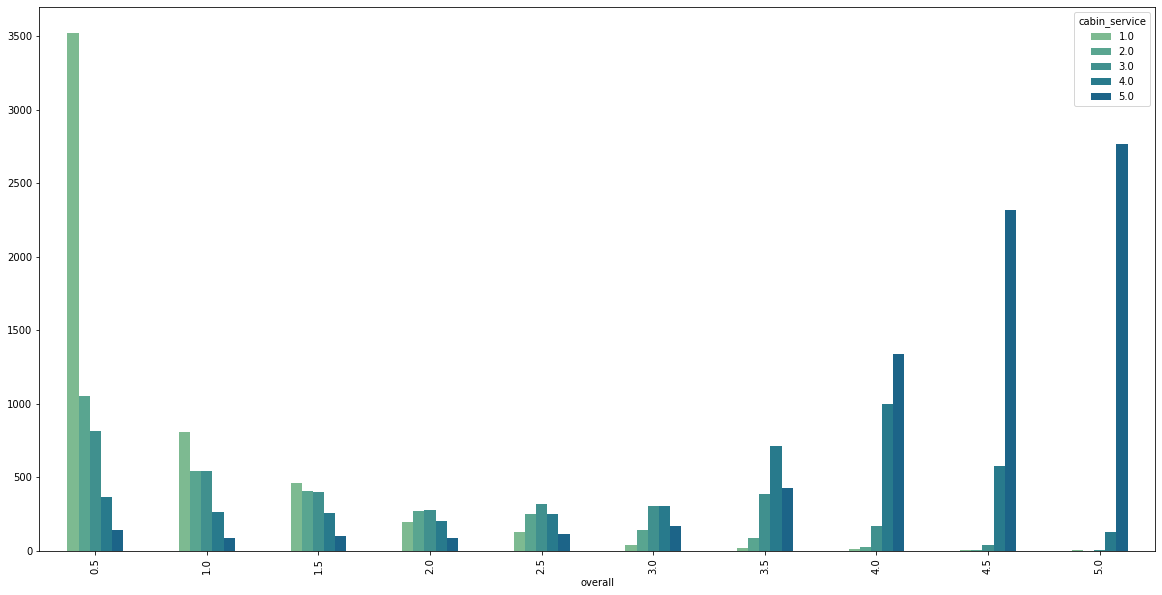

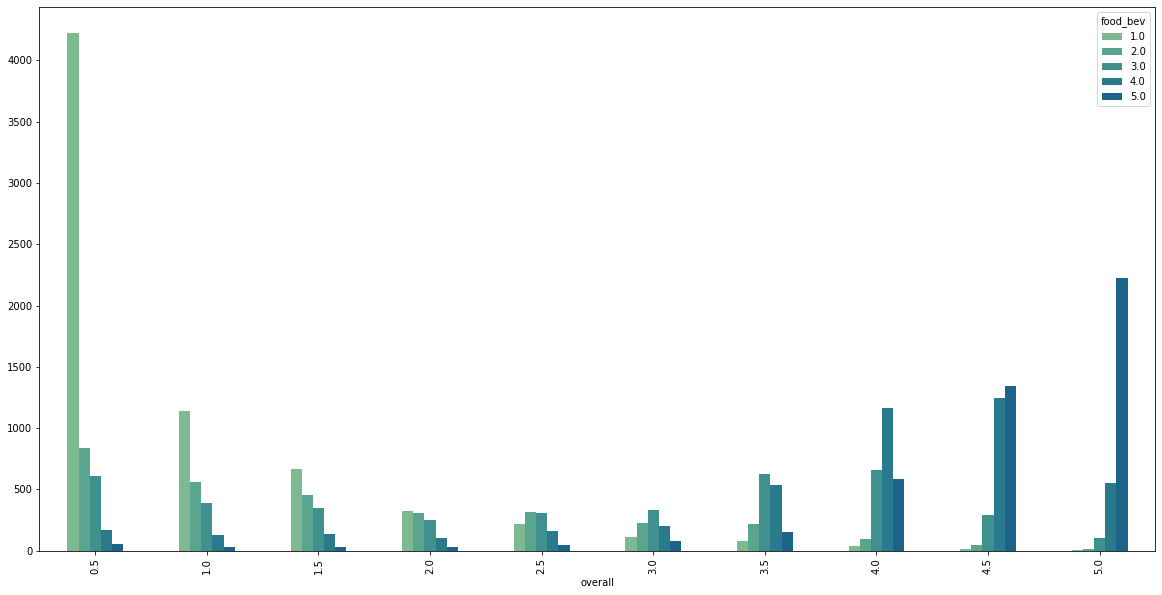

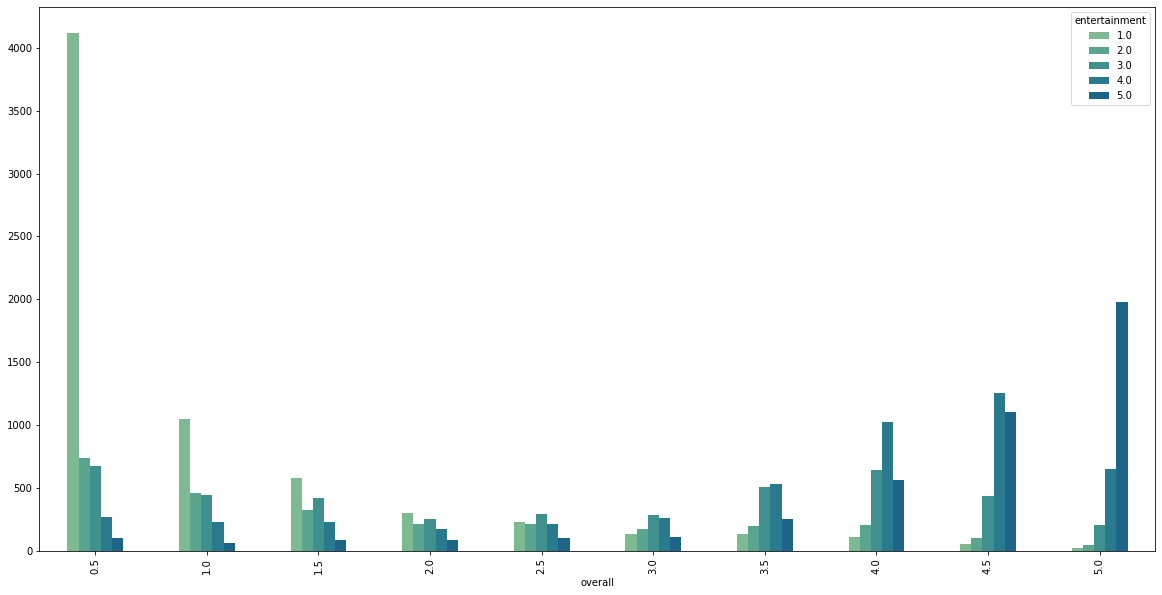

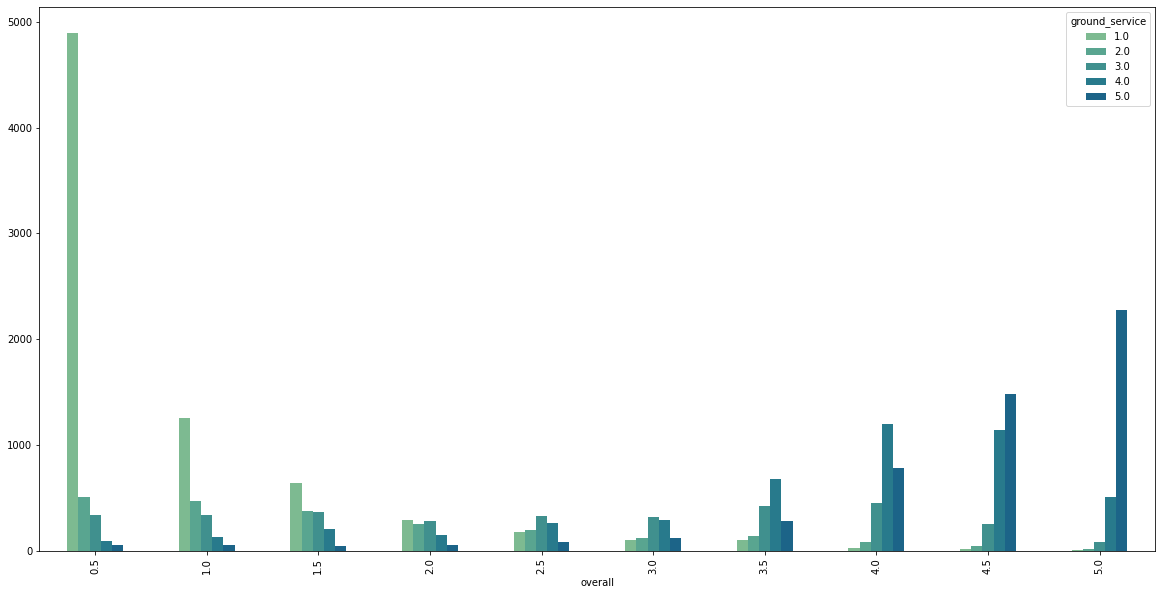

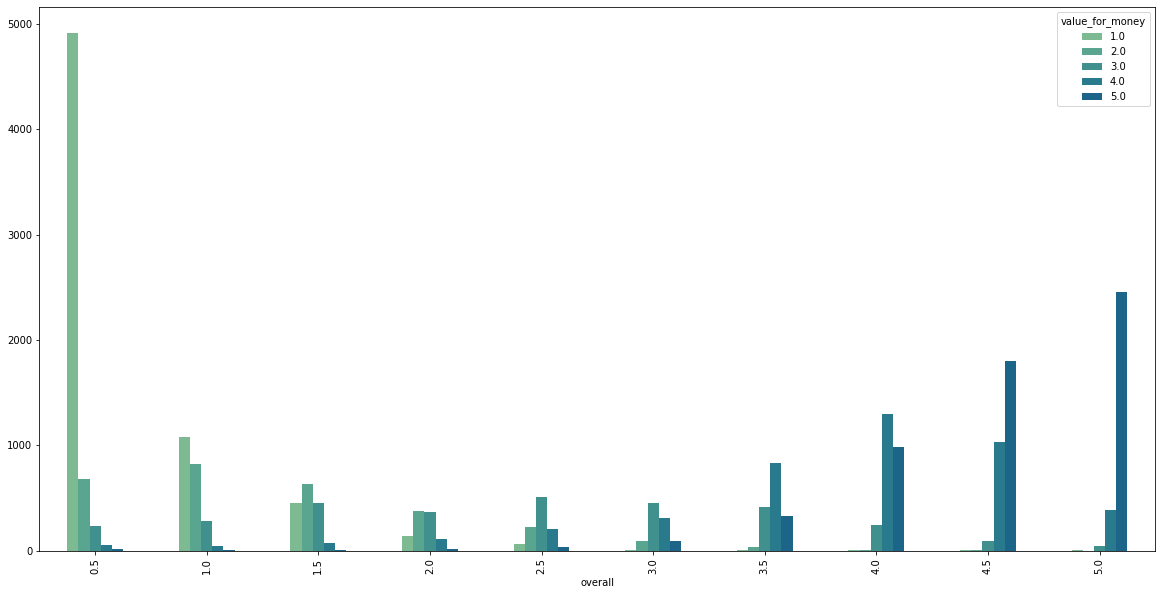

In [35]:
# Understanding the relationship of the various kinds of ratings with the overall ratings using a loop
sns.set_palette('crest')
for i in review_columns[1:]:
  x = airline_df.groupby([airline_df['overall']])
  x[i].value_counts().unstack().plot(kind= 'bar', figsize=(20,10))

*As we can see above, the overall ratings column is a direct result of all of the other review columns. It means that the overall ratings increase with the increase in the other ratings.*

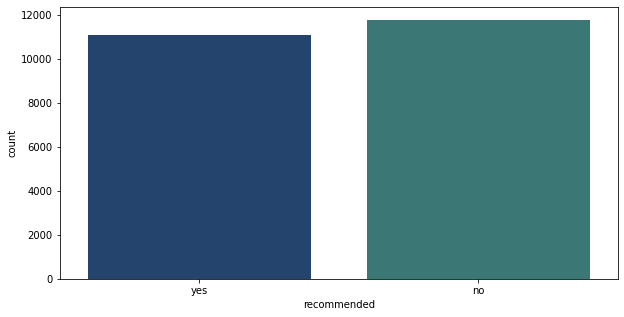

In [36]:
#Visualizing the recommendation count
sns.set_palette('gist_earth')
plt.figure(figsize=(10,5))
sns.countplot(x = 'recommended', data = airline_df)

* According to the graph above, even though not recommended is higher, the difference between recommended and not recommended is not significantly higher.
* Over 11000 people have recommended it to others.

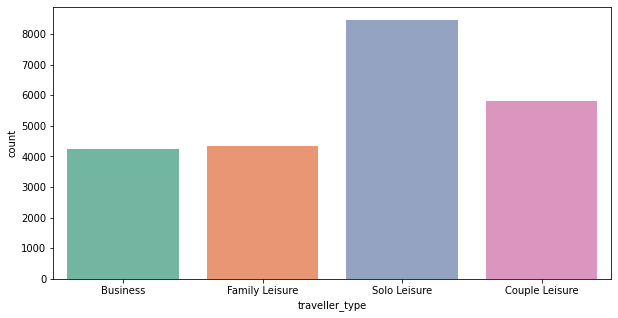

In [37]:
#Count of each type of travellers
sns.set_palette('Set2')
plt.figure(figsize=(10,5))
sns.countplot(x = 'traveller_type', data = airline_df)

* The majority of reviewers are solo leisure travellers, followed by couple leisure travellers. Both business and leisure travellers have few but equal reviews.
* *As a result, the majority of travellers are Solo Leisure.*

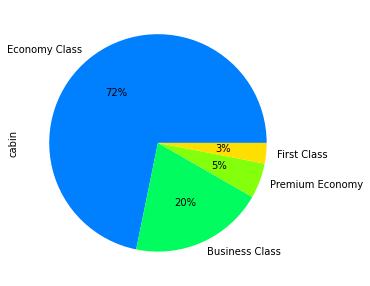

In [38]:
# Get the number of passengers for each cabin class through pie chart visualization
sns.set_palette('gist_ncar')
airline_df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))

*  The majority of reviewers are from the Economy Class cabin type.
*  The number of first-class cabin type reviewers is the least.

Text(0.5, 1.0, 'Airline Count Distribution')

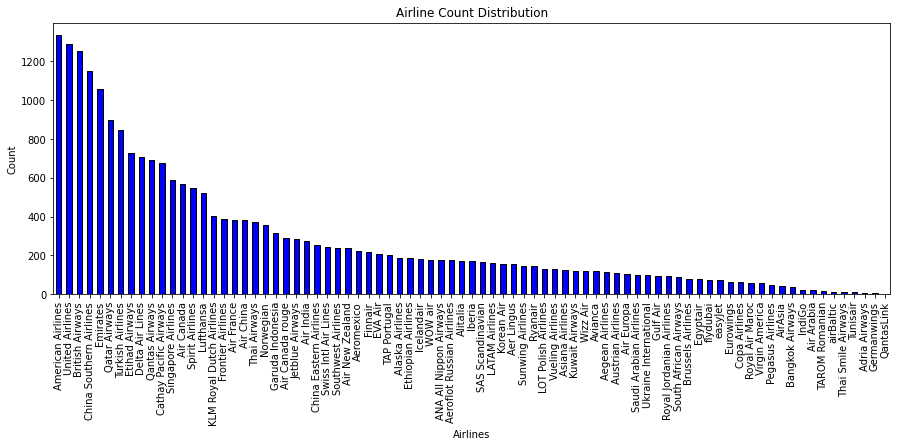

In [39]:
#Checking the reviews distribution with respect to the airlines
plt.figure(figsize=(15,5))
airline_df['airline'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

* American Airlines get most reviews followed by united Airlines and British Airways.
* Qantaslink get least reviews followed by Germanwings and Andria Airways.

Let's check the top 10 airlines with most reviews :

Text(0.5, 1.0, 'Airline Count Distribution')

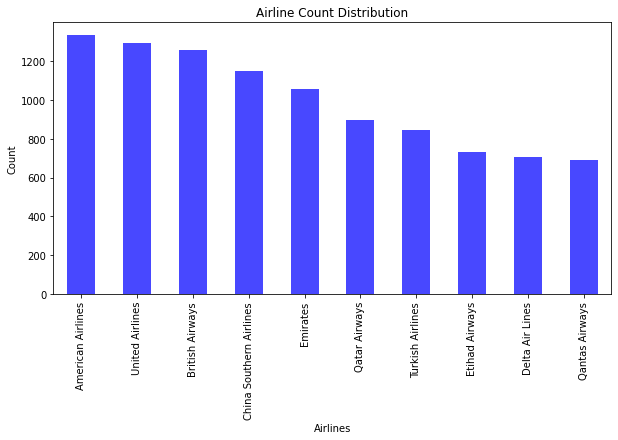

In [40]:
# Checking the reviews distribution with respect to the top 10 airlines with most number of reviews
plt.figure(figsize=(10,5))
sns.set_palette("bwr")
airline_df['airline'].value_counts().nlargest(10).plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

Let's check the bottom 10 airlines with Least reviews :

Text(0.5, 1.0, 'Airline Count Distribution')

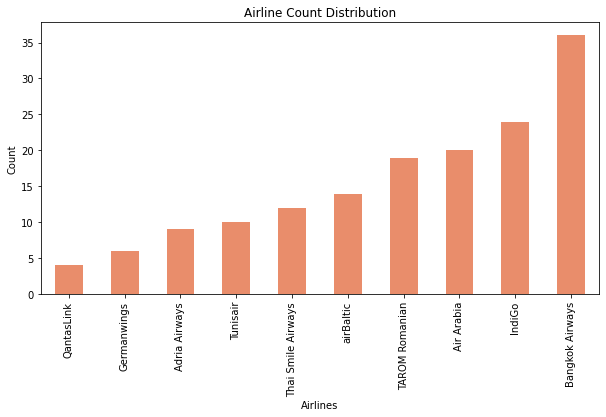

In [41]:
# checking the reviews distribution with respect to the top airlines with least number of reviews
plt.figure(figsize=(10,5))
sns.set_palette("flare")
airline_df['airline'].value_counts().nsmallest(10).plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

Text(0.5, 1.0, 'Traveller Type Count Distribution')

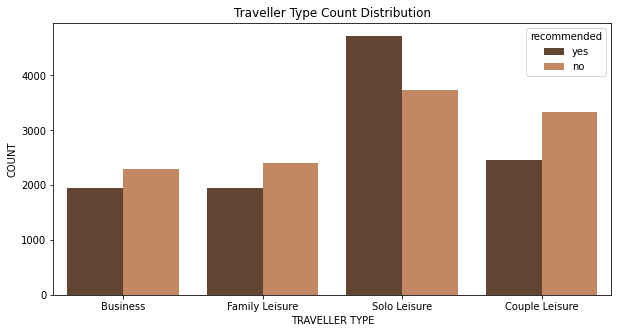

In [42]:
# Traveller Type Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="traveller_type", hue="recommended", data=airline_df, palette="copper")
plt.xlabel("TRAVELLER TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Traveller Type Count Distribution")

Text(0.5, 1.0, 'Cabin Type Count Distribution')

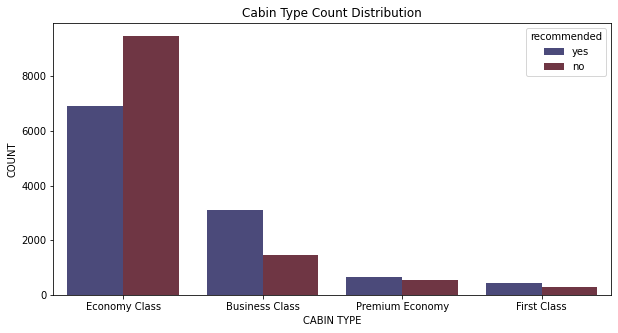

In [43]:
# Cabin Type Count Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="cabin", hue="recommended", data=airline_df, palette="icefire")
plt.xlabel("CABIN TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Cabin Type Count Distribution")

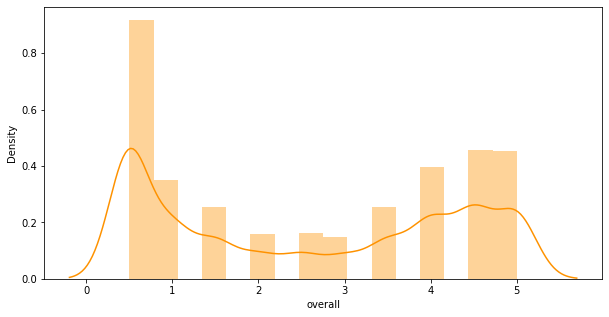

In [44]:
# Checking the density of the overall reviews
plt.figure(figsize=(10,5))
sns.set_palette("Wistia_r")
sns.distplot(airline_df['overall'])

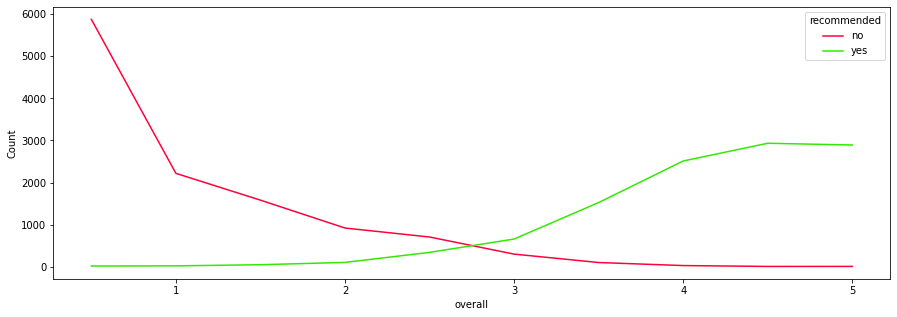

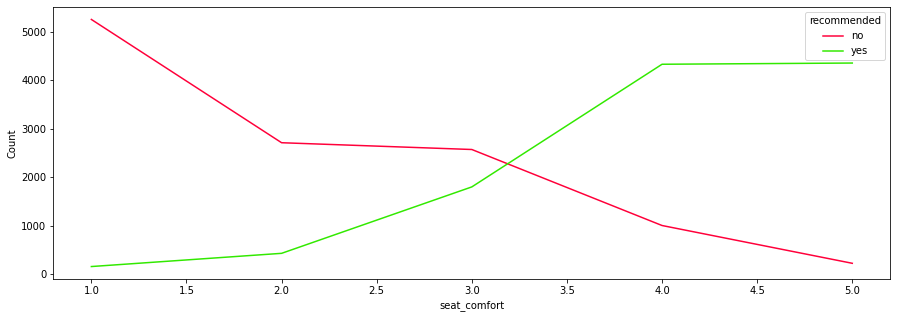

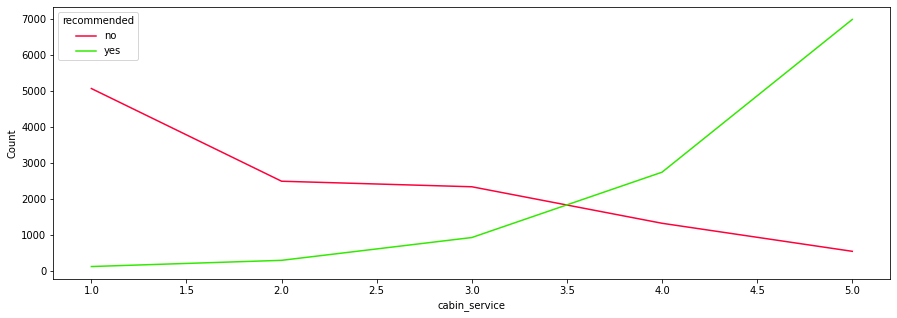

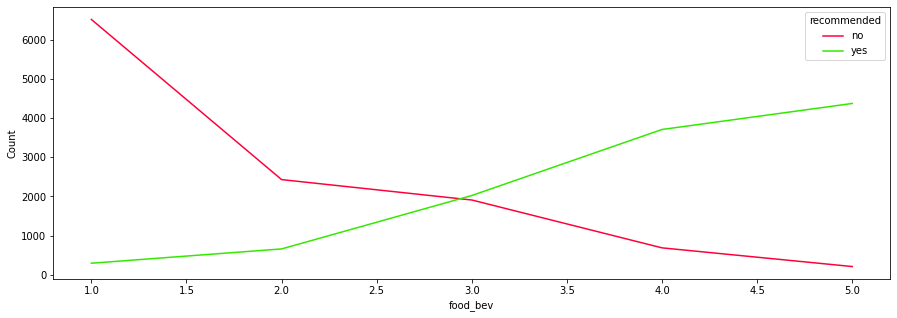

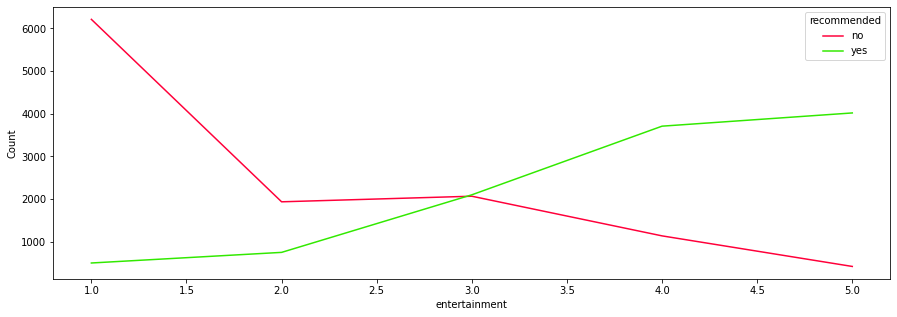

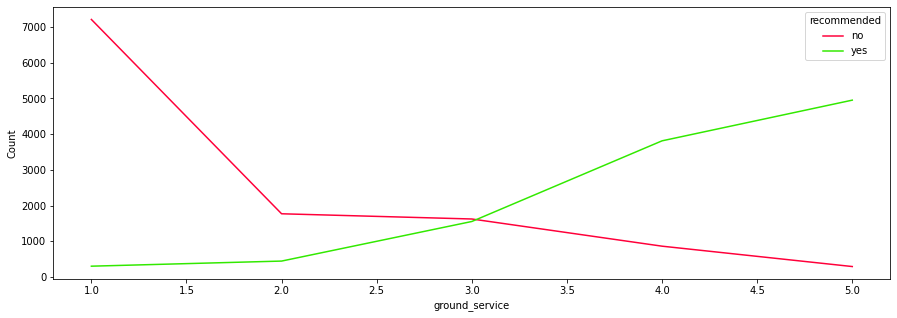

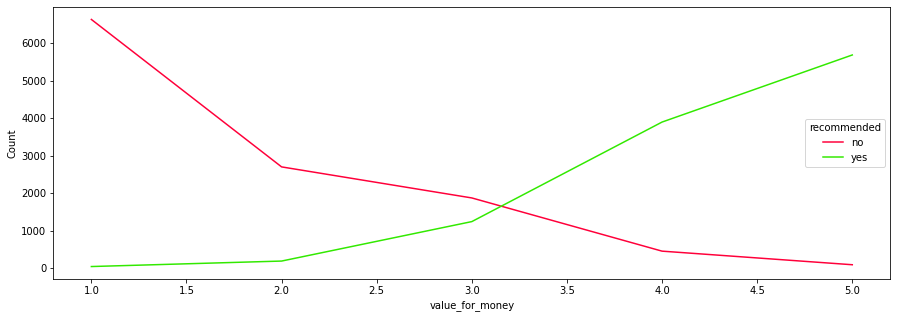

In [45]:
# Understanding the relationship of the various kinds of ratings with the overall ratings using a loop
for i in review_columns:
  count_rec = airline_df.groupby([i,'recommended'])[['recommended']].count()
  count_rec.columns = ['Count']
  count_rec = count_rec.reset_index()
  plt.figure(figsize=(15,5))
  sns.lineplot(x=i, y='Count', hue='recommended', data=count_rec ,palette='prism_r')


The above plot shows the direct dependency of all type of ratings and the recommendation status. As the overall rating increases, there's more chance of recommendation. As the overall rating decreases decrease, there's less chance of recommendations.



### **NLP for User Reviews/ Sentiment Analysis:**

In [46]:
#Install VaderSentiment package for sentiment analysis:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 7.2 MB/s eta 0:00:00


In [47]:
# Importing SentimentIntensityAnalyzer class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
#creating function to get sentiment score for review
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    #scorring each reviews depending on their polarity
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [49]:
# creating numeric review column to store polarity for each customer review
airline_df['numeric_review']= airline_df['customer_review'].apply(sentiment_scores)

In [50]:
# checking the full text of customer reviews randmomly
airline_df.iloc[23,:]['customer_review']

'âœ… Trip Verified | Atlanta to Amman via Istanbul. Beside being one of the filthiest airport bathrooms and cheap of course for not making it easy to use the Wi-Fi, they make us wait 5 more hours in the transit just because they can fill up the plane by merging another plane for people who are going to Amman without giving us any notice! And after waiting hours now to check-in online, now they saying check-in at the counter. Bad food on the plane, bad select of movies and entertainments and of course bad customer service in the airport.'

In [51]:
#comparing the customer review with the generated numeric review
airline_df.iloc[23,:]['numeric_review']

-0.8986

In [52]:
# checking the full text of customer reviews randmomly
airline_df.iloc[56,:]['customer_review']

'âœ… Trip Verified | Athens to Havana via Istanbul. Amazing crew service. On time. Great selection of music and movies on the IFE. The food was delicious with 2 choices and menu card and real cutlery. Also amenity.'

In [53]:
#comparing the customer review with the generated numeric review
airline_df.iloc[56,:]['numeric_review']

0.9118

*We can clearly see from the above example that our numeric_review column explains the user sentiment from the customer_reviews column very accurately we can drop the customer reviewbecause we won't need it any further*

In [54]:
airline_df["Overall Review Sentiment"] = np.where(airline_df["numeric_review"] >= 0.5,"Positive",
                                                       np.where(airline_df["numeric_review"] <= -0.5,"Negative","Neutral"))

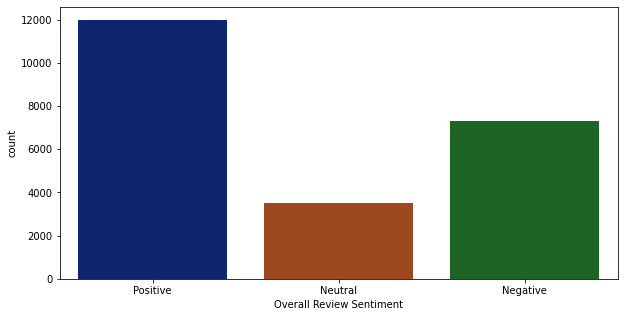

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Overall Review Sentiment', data = airline_df, palette="dark")

# **FEATURE SELECTION:**

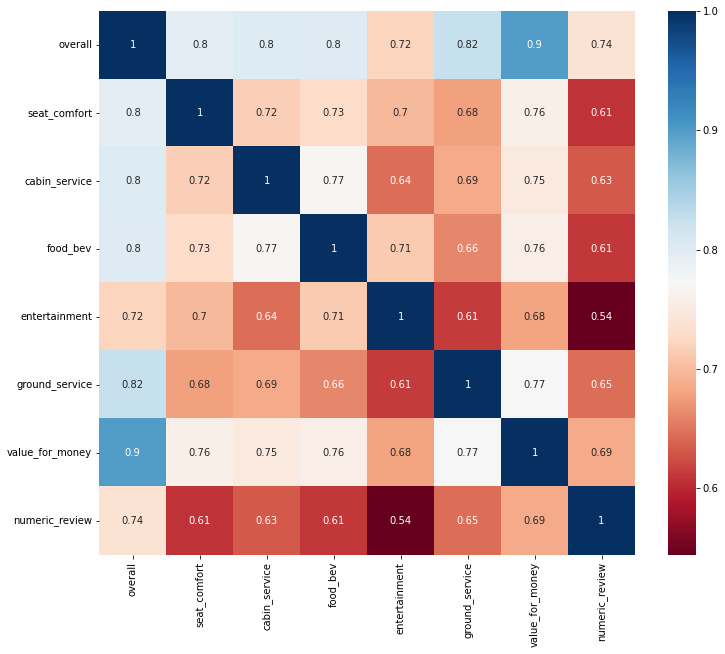

In [56]:
#Heatmap with correlation details
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True, cmap='RdBu')

In [57]:
airline_df.columns

Index(['airline', 'overall', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'route', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended', 'numeric_review', 'Overall Review Sentiment'],
      dtype='object')

In [58]:
airline_df.drop(["customer_review","review_date",'route','Overall Review Sentiment'],axis = 1,inplace = True)

In [59]:
# categoriacal features to do one hot encoding
categorical_columns =['airline','cabin','traveller_type']
     

airline_df= pd.get_dummies(airline_df,columns=categorical_columns , drop_first = False)

In [60]:
airline_df.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'numeric_review',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air 

# **MODEL IMPLEMENTATION:**

In [61]:
#Scaling back to 0 -5 rating
airline_df["seat_comfort"] = airline_df["seat_comfort"]/2
airline_df["cabin_service"] = airline_df["cabin_service"]/2
airline_df["food_bev"] = airline_df["food_bev"]/2
airline_df["entertainment"] = airline_df["entertainment"]/2
airline_df["ground_service"] = airline_df["ground_service"]/2
airline_df["value_for_money"] = airline_df["value_for_money"]/2

 *Split into train and test:*

In [62]:
  # Create the independent variable data
X = airline_df.drop(['recommended'],axis=1)


# Create the dependent variable data
y = airline_df['recommended']

In [63]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

In [64]:
#Checking the test and train sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17119, 97)
(17119,)
(5707, 97)
(5707,)


In [65]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE","ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns = column_names) 

In [66]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df= pd.DataFrame(columns = column)


In [67]:
#creating function for storing evaluation metrices
def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(y_test, y_pred), 
                  'RECALL': recall_score(y_test, y_pred, pos_label="yes"),
                  'PRECISION':precision_score(y_test, y_pred, pos_label="yes"),
                  'F1-SCORE':f1_score(y_test, y_pred, pos_label="yes")
                  #,'ROC AUC SCORE':roc_auc_score(y_test,y_pred)
                  }
                  ,ignore_index=True)
  return df

### **LOGISTIC REGRESSION:**

In [68]:
#logistic regression
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
score=lr.score(X_test,y_test)
print(f'Logistic regression score : {score}')

Logistic regression score : 0.957420711407044


              precision    recall  f1-score   support

          no       0.96      0.96      0.96      2945
         yes       0.96      0.96      0.96      2762

    accuracy                           0.96      5707
   macro avg       0.96      0.96      0.96      5707
weighted avg       0.96      0.96      0.96      5707

Accuracy of the Model: 95.7420711407044%



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

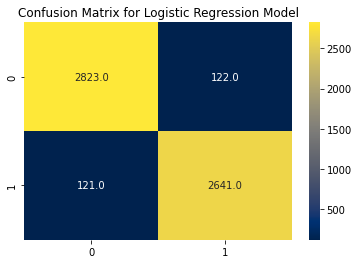

In [69]:
#Evaluation of the logistic regression model
predicted = lr.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression Model")


In [70]:
metrics_df=add_metrics_details("Logistic Regression",y_test,predicted,metrics_df)

### **DECISION TREE:**

In [71]:
#Decision Tree
dtc =DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score=dtc.score(X_test,y_test)
print(f'Decision Tree score : {score}')

Decision Tree score : 0.9407744874715261


              precision    recall  f1-score   support

          no       0.96      0.96      0.96      2945
         yes       0.96      0.96      0.96      2762

    accuracy                           0.96      5707
   macro avg       0.96      0.96      0.96      5707
weighted avg       0.96      0.96      0.96      5707

Accuracy of the Model: 95.7420711407044%



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree  Model')

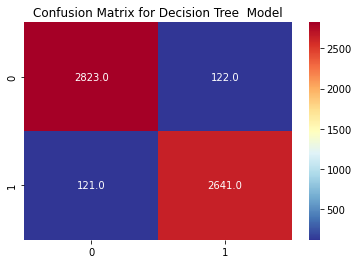

In [72]:
#Evaluation of the model
y_pred = dtc.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdYlBu_r")
plt.title("Confusion Matrix for Decision Tree  Model")

In [73]:
metrics_df=add_metrics_details("Decision Tree",y_test,predicted,metrics_df)

### **XGBOOST MODEL:**

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test, y_test)

0.9596986157350622

              precision    recall  f1-score   support

          no       0.96      0.96      0.96      2945
         yes       0.96      0.96      0.96      2762

    accuracy                           0.96      5707
   macro avg       0.96      0.96      0.96      5707
weighted avg       0.96      0.96      0.96      5707

Accuracy of the Model: 95.96986157350622%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost  Model')

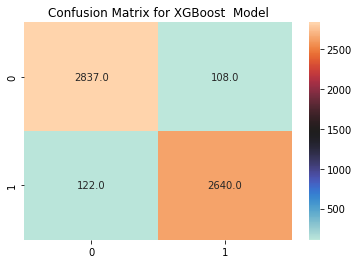

In [75]:
#Evaluation of the model
predicted = xgb.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test, predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="icefire")
plt.title("Confusion Matrix for XGBoost  Model")

In [76]:
metrics_df=add_metrics_details("XGBoost",y_test,predicted,metrics_df)

### **LIGHT GRADIENT BOOST:**


In [77]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

0.958997722095672

              precision    recall  f1-score   support

          no       0.96      0.96      0.96      2945
         yes       0.96      0.96      0.96      2762

    accuracy                           0.96      5707
   macro avg       0.96      0.96      0.96      5707
weighted avg       0.96      0.96      0.96      5707

Accuracy of the Model: 95.8997722095672%



Text(0.5, 1.0, 'Confusion Matrix for Light GBM  Model')

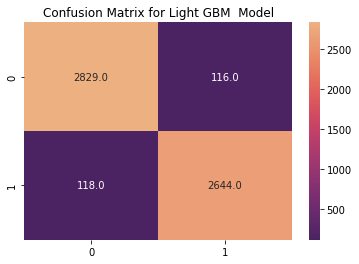

In [78]:
#Evaluation of the model
predicted = lgbm.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="flare_r")
plt.title("Confusion Matrix for Light GBM  Model")

In [79]:
metrics_df=add_metrics_details("Light GBM",y_test,predicted,metrics_df)

### **SUPPORT VECTOR MACHINE:**

In [80]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9584720518661293

              precision    recall  f1-score   support

          no       0.96      0.96      0.96      2945
         yes       0.96      0.95      0.96      2762

    accuracy                           0.96      5707
   macro avg       0.96      0.96      0.96      5707
weighted avg       0.96      0.96      0.96      5707

Accuracy of the Model: 95.84720518661292%



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Model')

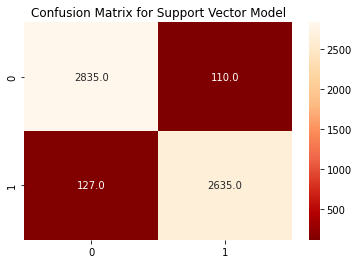

In [81]:
#Evaluation of the model
predicted = svc.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="OrRd_r")
plt.title("Confusion Matrix for Support Vector Model")

In [82]:
metrics_df=add_metrics_details("Support Vector Machine",y_test,predicted,metrics_df)

### **RANDOM FOREST:**

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.9605747327843

              precision    recall  f1-score   support

          no       0.96      0.97      0.96      2945
         yes       0.96      0.95      0.96      2762

    accuracy                           0.96      5707
   macro avg       0.96      0.96      0.96      5707
weighted avg       0.96      0.96      0.96      5707

Accuracy of the Model: 96.05747327843%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Model')

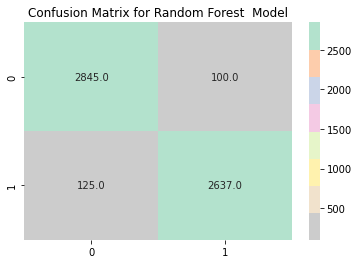

In [84]:
#Evaluation of the model
predicted = rf.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test, predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Pastel2_r")
plt.title("Confusion Matrix for Random Forest  Model")

In [85]:
metrics_df=add_metrics_details("Random Forest",y_test,predicted,metrics_df)

### **K-NEAREST NEIGHBOUR:**

In [86]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.9575959348168915

              precision    recall  f1-score   support

          no       0.96      0.96      0.96      2945
         yes       0.96      0.95      0.96      2762

    accuracy                           0.96      5707
   macro avg       0.96      0.96      0.96      5707
weighted avg       0.96      0.96      0.96      5707

Accuracy of the Model: 95.75959348168915%



Text(0.5, 1.0, 'Confusion Matrix for KNN  Model')

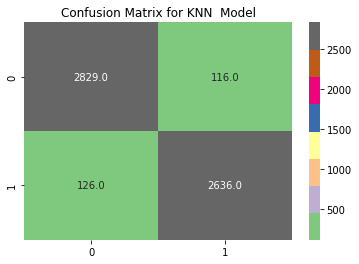

In [87]:
#Evaluation of the model
predicted = knc.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Accent")
plt.title("Confusion Matrix for KNN  Model")

In [88]:
metrics_df=add_metrics_details("KNN Model",y_test,predicted,metrics_df)

### **XG-BOOST GRIDSEARCH CV:**

In [ ]:
# Hyperparameter Tuning
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}
xg_model_gridcv = GridSearchCV(estimator=xgb,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   3.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   4.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   3.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   2.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   4.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   5.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   4.5s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   5.1s
[CV] END max_depth=6, min_sa

In [ ]:
xg_model_gridcv.best_estimator_

In [ ]:
xg_model_gridcv.best_params_

In [ ]:
xg_model_gridcv_best = xg_model_gridcv.best_estimator_

In [ ]:
predicted = xg_model_gridcv_best.predict(X_test)

In [ ]:
#Evaluation of the model
predicted = xg_model_gridcv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="GnBu")
plt.title("Confusion Matrix for XGBoost - GridSearchCV")

In [ ]:
metrics_df=add_metrics_details("XGBoost - GridSearchCV",y_test,predicted,metrics_df)

### **RANDOM FOREST GRIDSEARCH CV:**

In [ ]:
rf_gridcv = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_gridcv.fit(X_train,y_train)

In [ ]:
rf_gridcv.best_estimator_

In [ ]:
rf_gridcv.best_params_

In [ ]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [ ]:
y_pred =rf_gridcv_best.predict(X_test)

In [ ]:
#Evaluation of the model
predicted = rf_gridcv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cubehelix")
plt.title("Confusion Matrix for Random Forest - GridSearchCV")

In [ ]:
metrics_df=add_metrics_details("Random Forest - GridSearchCV",y_test,predicted,metrics_df)

### **KNN GRID-SEARCH CV:**

In [ ]:
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_cv = GridSearchCV(knc, knn_params, cv=5)
knn_cv.fit(X_train, y_train)

In [ ]:
knn_cv.best_estimator_

In [ ]:
knn_cv_best = knn_cv.best_estimator_

In [ ]:
#Evaluation of the model
predicted = knn_cv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="brg")
plt.title("Confusion Matrix for KNN - GridSearchCV")

In [ ]:
metrics_df=add_metrics_details("KNN - GridSearchCV",y_test,predicted,metrics_df)

### **PREDICTION MODEL COMPARISON:**

In [ ]:
#printing the model accuracy dataframe
metrics_df